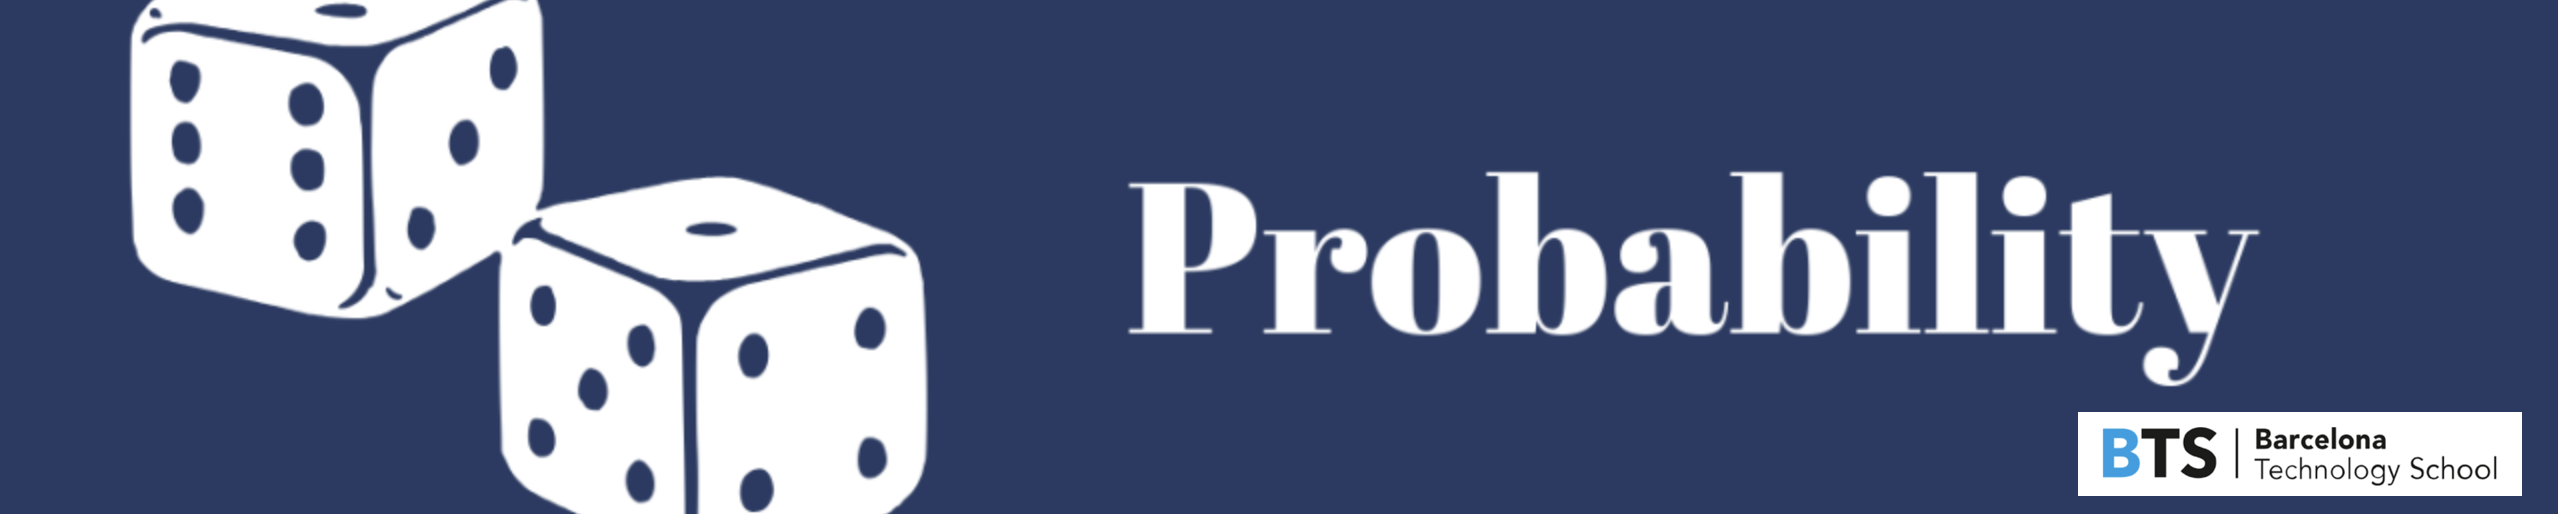

# Probability

Here you have some exercices on pure probability and probability applied to Statistics.

Use your resources and your creativity to solve them and provide valuable answers.

## Exercise 1. The last door.

![Image](thelastdoor.jpg)

In the last stage of the TV contest, there's a prize behind one of the three doors.\
You select one door (for example, door number 1).\
The conductor opens one door (for example, door number 2), which hasn't the prize.\
He lets you switch and select the other door (for example, door number 3) o stay with the door you firstly selected (i.e. door number 1).

What would you do? Change or stay?

The key point here is to  determine **which of these 2 sentences is the true one and which is false one**:
- The probability of winning is 1/2, so it doesn't matter if you switch the door or not.
- The probability of winning is 1/3 if you stay with your initial choice and 2/3 if you switch the door, so it is better to switch.


\
To answer the dilemma, simulate 100,000 cases and count the number of wins and losses. Follow this instructions:
1. For each case, randomly select the location of the prize. Create an array of 100,000 random numbers between 1 and 3. Name it `location`.
2. For each case, randomly select the initial choice. Create and array of 100,000 random number between 1 and 3. Name it `initial_choice`.
3. For each case, if `initial_choice` is equal to `location`, randomly select one of the other two numbers. If `initial_choice` is different from `location`, select the other remaining number. Name it `open`.
4. For each case, randomly decide to stay (0) or switch (1). Name it `decision`.
5. For each case, determine which is the final door selected. Name it `final_choice`.
6. For each case, determine if `location` is equal to the `final_choice` and determine the result: lose (0) or win (1).
7. Count the number of wins and losses for each `decision`.
8. Draw a graphic whith the counts.
9. Determine the probability of winning for each `decision`. Is it $\frac{1}{2}$ and $\frac{1}{2}$ or the other way $\frac{1}{3}$ and $\frac{1}{3}$?
 

### True statement: 
#### The probability of winning is 1/3 if you stay with your initial choice and 2/3 if you switch the door, so it is better to switch.

In [433]:
import numpy as np
import matplotlib.pyplot as plt

num_cases = 100000

#### 1: Randomly select location of the prize

In [436]:
location = np.random.randint(1, 4, size=num_cases)
location

array([2, 1, 2, ..., 1, 1, 1])

#### 2: Randomly select initial choice of the prize

In [439]:
initial_choice = np.random.randint(1, 4, size=num_cases)
initial_choice

array([1, 1, 1, ..., 3, 1, 1])

#### 3: Determine which door the conductor opens

In [444]:
open_door = np.zeros(num_cases, dtype=int)

# For each case, determine which door the conductor opens
for i in range(num_cases):
    if initial_choice[i] == location[i]:
        open_door[i] = np.random.choice([door for door in [1, 2, 3] if door != initial_choice[i]])
    else:
        open_door[i] = [door for door in [1, 2, 3] if door != initial_choice[i] and door != location[i]][0]

open_door

array([3, 2, 3, ..., 2, 3, 2])

#### 4: Randomly decide to stay (0) or switch (1)

In [446]:
decision = np.random.randint(0, 2, size=num_cases)
decision

array([1, 0, 0, ..., 1, 0, 1])

#### 5: Determine the final choice based on the decision (stay or switch)

In [449]:
final_choice = np.zeros(num_cases, dtype=int)
for i in range(num_cases):
    if decision[i] == 0:  # Stay
        final_choice[i] = initial_choice[i]
    else:  # Switch
        final_choice[i] = [door for door in [1, 2, 3] if door != initial_choice[i] and door != open_door[i]][0]
final_choice

array([2, 1, 1, ..., 1, 1, 3])

#### 6: Determine the result (win or lose)

In [407]:
result = (location == final_choice).astype(int)
result

array([1, 1, 1, ..., 1, 1, 0])

#### 7: Count the number of wins and losses for each decision

In [411]:
wins_stay = np.sum(result[decision == 0])
losses_stay = np.sum(result[decision == 0] == 0)
wins_switch = np.sum(result[decision == 1])
losses_switch = np.sum(result[decision == 1] == 0)
wins_stay, losses_stay, wins_switch, losses_switch

(166758, 333130, 333679, 166433)

#### 8: Plot the results

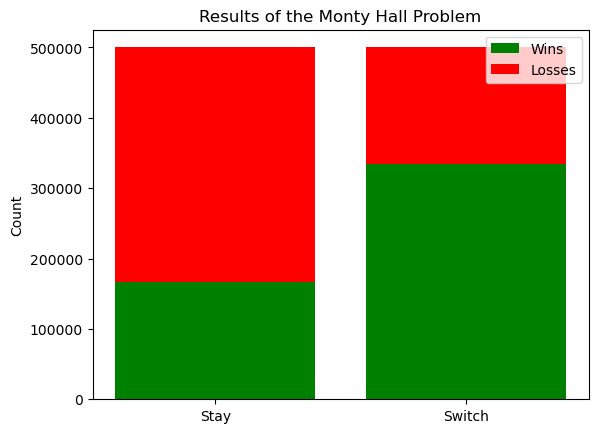

In [414]:
plt.bar(['Stay', 'Switch'], [wins_stay, wins_switch], color='green', label='Wins')
plt.bar(['Stay', 'Switch'], [losses_stay, losses_switch], bottom=[wins_stay, wins_switch], color='red', label='Losses')
plt.ylabel('Count')
plt.title('Results of the Monty Hall Problem')
plt.legend()
plt.show()

#### 9: Calculate the probabilities

In [417]:
prob_win_stay = wins_stay / (wins_stay + losses_stay)
prob_win_switch = wins_switch / (wins_switch + losses_switch)

prob_win_stay, prob_win_switch

(0.3335907243222482, 0.6672085452858559)

### True statement: 
#### The probability of winning is 1/3 if you stay with your initial choice and 2/3 if you switch the door, so it is better to switch.

## Exercise 2. Binomial distribution.

We have gathered 2000 families with 4 children. Answer the following questions using the Binomial probability mass function `binom.pmf()` or the Binomial cumulative density function `binom.cdf()`.

1. Expected number of families with at least 1 boy, $P(\#boys \ge 1)$.
2. Expected number of families with 2 boys $P(\#boy=2)$.
3. Expected number of families with 1 or 2 girls $P(\#girls = 1)+P(\#girls=2)$.
4. Expected number of families with no girls $P(\#girls = 0)$.

In [86]:
from scipy.stats import binom

# Number of children per family and number of families
n_children = 4
num_families = 2000
p_boy = 0.5
p_girl = 0.5 # Assuming equal probability for boys and girls

#### 1. Expected number of families with at least 1 boy

In [89]:
p_at_least_1_boy = 1 - binom.pmf(0, n_children, p_boy)  # P(X >= 1) = 1 - P(X = 0)
expected_families_at_least_1_boy = p_at_least_1_boy * num_families
expected_families_at_least_1_boy

1875.0

#### 2. Expected number of families with 2 boys

In [78]:
# 2. Expected number of families with exactly 2 boys
p_exactly_2_boys = binom.pmf(2, n_children, p_boy)
expected_families_exactly_2_boys = p_exactly_2_boys * num_families
expected_families_exactly_2_boys


750.0000000000003

#### 3. Expected number of families with 1 or 2 girls

In [91]:
p_1_girl = binom.pmf(1, n_children, p_girl)
p_2_girls = binom.pmf(2, n_children, p_girl)
expected_families_1_or_2_girls = (p_1_girl + p_2_girls) * num_families
expected_families_1_or_2_girls

1250.0000000000002

#### 4. Expected number of families with no girls

In [94]:
p_no_girls = binom.pmf(0, n_children, p_girl)
expected_families_no_girls = p_no_girls * num_families
expected_families_no_girls

125.0

## Exercise 3. Normal distribution.

The Normal distribution is the most useful continuous distribution in Statistics. 

If a numerical variable follows a Normal distribution, the mean and the standard deviation of the sample can be used as the mean and the standard deviation of the population, the so called $\mu$ and $\sigma$ parameters.

Once we have the values of $\mu$ and $\sigma$ we can use the Normal distribution to ask questions about the properites of the population.


The area under the curve between two values $a$ and $b$ of the Normal Distribution accounts for the probability of observing a individual with a value between $a$ and $b$. Mathematically it is written as:
$$ P(a < x < b) = \int_a^b f(x) dx = \int_a^b \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx$$


![Image](NormArea.jpg)

In this case, the area under the curve between $a=-0.5$ and $b=1$ gives ther probability of observing an individual with a value between $-0.5%$ and $1$.

The Cumulative Density Function `norm.cdf(x,mu,sigma)` of the Normal distribution returns the area under the curve from $-\infty$ to the value $x$. For example, `norm.cdf(1,0,1)` returns the area of the shadowed region on the left, and `norm.cdf(-0.5,0,1)` returns the area of the shadowed region on the right. Not to be confused with the probability density function (pdf) than returns the value of the curve $f(x)$ for each value, not the area.

![Image](NormAreaMinusInf.jpg)

The area under the curve can be added and subtracted to select the exact region to be calculated. So we can calculate any region:

$P(a<x<b)=P(x<b)-P(x<a)$

using the .cdf function:

`norm.cdf(b,mu,sigma) - norm.cdf(a,mu,sigma)`



### Question

Our factory produces washers with a nominal internal diameter of 1 cm. We take a sample of 20 washers and measure their diameters. Here you have the data:


In [598]:
diameters = np.array([1.00245188, 0.99088092, 0.98855512, 0.99710123, 0.9961659 ,
       1.0031023 , 1.00666908, 0.99934559, 0.99956528, 1.00699083,
       1.00515428, 0.99950846, 1.00044167, 0.99177651, 1.00219456,
       0.99987673, 0.99644936, 0.99643225, 1.0139469 , 0.9979772 ])

Do the following:

1. The mean of the sample.
2. The standard deviation of the sample.
3. Define a variable $\mu$ equal to the mean of the sample and a variable $\sigma$ equal to the standard deviation of the sample.
4. A washer is considered defective if its internal diameter i smaller than $0.99\ \textrm{cm}$ or if it is larger than $1.01\ \textrm{cm}$. Calculate the corresponding $z$ value of these limits. The $z$ value is obtained after subtracting the mean and dividing by the standard deviation: $z=\frac{x-\mu}{\sigma}$.
5. Use the Probability Density Function `norm.cdf` to calculate the percentage of defective washers produced in the factory.

In [133]:
# 1. Mean and standard deviation of the sample
mean_sample = np.mean(diameters)
std_sample = np.std(diameters)

# 2. Define μ and σ
mu = mean_sample
sigma = std_sample

# 3. Defective limits (1% tolerance on nominal diameter of 1 cm)
lower_limit = 1 - 0.01  # 0.99 cm
upper_limit = 1 + 0.01  # 1.01 cm

# 4. Calculate z-scores for the limits
z_lower = (lower_limit - mu) / sigma
z_upper = (upper_limit - mu) / sigma

# 5. Percentage of defective washers
p_defective = norm.cdf(z_lower, 0, 1) + (1 - norm.cdf(z_upper, 0, 1))
percentage_defective = p_defective * 100

# Results
print(f"Mean Sample: {mean_sample}")
print(f"Standard Deviation Sample: {std_sample}")
print(f"mu: {mu}")
print(f"sigma: {sigma}")
print(f"Z Lower: {z_lower}")
print(f"Z Upper: {z_upper}")
print(f"Percentage of defective washers produced: {percentage_defective}%")

Mean Sample: 0.9997293025000001
Standard Deviation Sample: 0.005782672737616116
mu: 0.9997293025000001
sigma: 0.005782672737616116
Z Lower: -1.6824923251684851
Z Upper: 1.7761159875414159
Percentage of defective washers produced: 8.409360677305216%



The Percent Point Function `norm.ppf` is the inverse function of the Cumulative Distribution Function `norm.cdf`. While de CDF returns the area under the curve (or the probability) for a given value of $x$, the PPF returns the value of $x$ for which the area under the curve is $p$.

For example, in the center of the Normal distribution ($x=0$) the area under the curve is $0.5$. Therefore, the value of `norm.ppf(x=0.5,mu=0,sigma=1)` is equal to $0$, because this point $x=0$ is half the total probability of 1. 

![Image](halfarea.jpg)

### Question

Find the lower and the upper limit of the diameters that include 99% of the washers.

In [140]:
# Confidence level (99%)
confidence = 0.99

# Calculate the lower and upper limits using the PPF (Percent Point Function)
lower_limit = norm.ppf((1 - confidence) / 2, loc=mu, scale=sigma)
upper_limit = norm.ppf(1 - (1 - confidence) / 2, loc=mu, scale=sigma)

# Results
print(f"Lower Limit: {lower_limit}")
print(f"Upper Limit: {upper_limit}")

Lower Limit: 0.9848341246096152
Upper Limit: 1.014624480390385


## Exercise 4. The Poisson distribution.

The Poisson distribution models a situation in which events happen at a certain rhythm at a time. This distribution has only one parameter and it represents the number of events per unit of time on average. Knowing this value, we can use the distribution to estimate the probability of deviations from the average number of events. The Probabiliy Mass Function (PMF) of the Poisson distribution is given by `poisson.pmf()`.

### Question

Our business is dedicated to serving clients who come to our offices. On average, we serve 4 clients per hour.

Assuming the arrival of clients follow a Poisson distribution:
1. Calculate the probability that we have to attend 10 clients at a certain hour of the day.
2. Calculate the probability that no client shows up at a certain hour of the day.
3. Calculate the proability of having to attend more than 4 clients at a certain hour of the day.
4. Draw the Poisson distribution to see the probabilities of having to attend between 0 and 13 clients.

In [150]:
from scipy.stats import poisson

# Average number of clients per hour (λ)
lambda_clients = 4

#### 1. Calculate the probability that we have to attend 10 clients at a certain hour of the day

In [153]:
prob_10_clients = poisson.pmf(10, lambda_clients)
prob_10_clients

0.005292476676420117

#### 2. Calculate the probability that no client shows up at a certain hour of the day.

In [156]:
prob_no_clients = poisson.pmf(0, lambda_clients)
prob_no_clients

0.01831563888873418

#### 3. Calculate the proability of having to attend more than 4 clients at a certain hour of the day.

In [159]:
prob_more_than_4_clients = 1 - poisson.cdf(4, lambda_clients)
prob_more_than_4_clients

0.3711630648201266

#### 4. Draw the Poisson distribution to see the probabilities of having to attend between 0 and 13 clients.

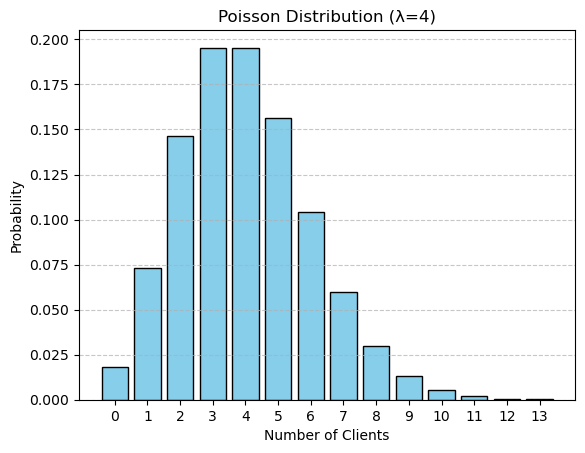

In [164]:
x_values = np.arange(0, 14)  # Range of clients from 0 to 13
y_values = poisson.pmf(x_values, lambda_clients)


plt.bar(x_values, y_values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Clients')
plt.ylabel('Probability')
plt.title('Poisson Distribution (λ=4)')
plt.xticks(x_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Exercise 5. Conditional probability.

Last year we analysed two dichotomous variables on a sample of 100 companies. One variable is the Cash Flow (Positive or Negative) and the other variable is the result of the Profit&Loss account (Profit or Loss).

Here you have the data.

|                | **Profit (P)** | **Loss (L)** | **Total** |
|----------------|------------|----------|-----------|
| (+) **Positive CF**| 73         | 2        | 75        |
|(-)  **Negative CF**| 7          | 18       | 25        |
| **Total**      | 80         | 20       | 100        |


Calculate the following probabilities:
1. Probability of making a profit $P(P)$.
2. Probability of making a profit if the compan Positive CF $P(P|+)$.
3. Probability of making a profit if the company has Negative CF $P(P|-)$.
4. Do the variable Cash Flow affect the variable P&L?
5. What would be the table if the variables were independent?

In [177]:
import pandas as pd

# Data
data = {
    "Profit (P)": [73, 7, 80],
    "Loss (L)": [2, 18, 20],
    "Total": [75, 25, 100]
}

df = pd.DataFrame(data, index=["Positive CF (+)", "Negative CF (-)", "Total"])
df

,Profit (P),Loss (L),Total
Positive CF (+),73,2,75
Negative CF (-),7,18,25
Total,80,20,100


#### 1. Probability of making a profit P(P)

In [181]:
P_P = df.loc["Total", "Profit (P)"] / df.loc["Total", "Total"]
P_P

0.8

#### 2. Probability of making a profit given Positive CF P(P|+)

In [185]:
P_P_given_Positive = df.loc["Positive CF (+)", "Profit (P)"] / df.loc["Positive CF (+)", "Total"]
P_P_given_Positive

0.9733333333333334

#### 3. Probability of making a profit given Negative CF P(P|-)

In [189]:
P_P_given_Negative = df.loc["Negative CF (-)", "Profit (P)"] / df.loc["Negative CF (-)", "Total"]
P_P_given_Negative

0.28

#### 4. Does Cash Flow affect the P&L variable?

In [219]:
from scipy.stats import chi2_contingency

# Create a contingency table (joint distribution of Cash Flow and P&L)
contingency_table = np.array([
    [73, 2],  # Positive CF, Profit and Loss
    [7, 18]   # Negative CF, Profit and Loss
])

# Perform a Chi-squared test for independence between CF and P&L
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


# Results
print(f"Chi-squared p-value': {p_value}")
print(f"Are the variables independent?: {p_value > 0.05}")
print()
print("Cashflow affects the P&L variable")

Chi-squared p-value': 5.319451669398623e-13
Are the variables independent?: False

Cashflow affects the P&L variable


#### 5. Create the table if the variables were independent

In [230]:
P_Positive_CF = df.loc["Positive CF (+)", "Total"] / df.loc["Total", "Total"]
P_Negative_CF = df.loc["Negative CF (-)", "Total"] / df.loc["Total", "Total"]

independent_table = pd.DataFrame(index=["Positive CF (+)", "Negative CF (-)", "Total"])
independent_table["Profit (P)"] = [
    P_Positive_CF * P_P * df.loc["Total", "Total"], 
    P_Negative_CF * P_P * df.loc["Total", "Total"], 
    df.loc["Total", "Profit (P)"]
]
independent_table["Loss (L)"] = [
    P_Positive_CF * (1 - P_P) * df.loc["Total", "Total"], 
    P_Negative_CF * (1 - P_P) * df.loc["Total", "Total"], 
    df.loc["Total", "Loss (L)"]
]
independent_table["Total"] = df["Total"]
independent_table

,Profit (P),Loss (L),Total
Positive CF (+),60.0,15.0,75
Negative CF (-),20.0,5.0,25
Total,80.0,20.0,100


## Exercise 6. Verify the Central Limit Theorem

1. Create 1000 samples from an exponential distribution with parameter $\lambda = 1$.
2. Create 1000 samples from a uniform distribution within the range $(3,6)$.
3. Create 1000 samples from a Poisson distribution with parameter $\lambda=2$.

For each group of 3 values, calculate their mean and save those 1000 values in a array named `variable`.

1. Compute the mean of the variable.
2. Compute the standard deviation of the variable.
3. Compute the standard error of the variable.
4. Draw the histogram of the variable.

Does it look like a Gaussian?

Draw the corresponding Gassian PDF function on top of the normalized histogram.

Repeat the exercise with a higher sample size $n=100,000$.

In [ ]:
# Sample size
sample_size = 1000

#### 1. Exponential distribution

In [237]:
lambda_exp = 1  # Exponential distribution rate (parameter lambda)
exp_samples = np.random.exponential(1 / lambda_exp, sample_size)
exp_samples

array([2.35189471e-01, 1.42801060e+00, 1.10948381e+00, 3.86021751e-01,
       7.35978102e-02, 1.58876052e+00, 4.29124277e-01, 2.39583552e+00,
       7.17455011e-01, 1.71336810e+00, 2.93304130e-01, 1.20183958e+00,
       2.70199470e+00, 2.44200983e-01, 3.26185725e+00, 1.12691838e+00,
       6.58437728e-01, 7.77320334e-01, 1.61310534e+00, 1.38575760e+00,
       5.90604834e-03, 6.76890035e-02, 8.95347377e-01, 8.05242670e-01,
       1.08236512e-01, 3.49905476e-01, 5.88515460e-01, 1.57924054e+00,
       5.55360301e-01, 3.30171708e-01, 1.35295281e+00, 1.10040334e-01,
       9.02843234e-01, 7.68829654e-02, 5.13057426e-01, 1.50409909e+00,
       1.15386249e-01, 5.03949275e-01, 2.41785738e+00, 3.66807253e-01,
       9.66849625e-02, 2.09024059e+00, 1.00431281e+00, 3.57990406e+00,
       1.17586704e+00, 1.49553451e+00, 1.95323855e+00, 5.33634210e-01,
       3.70014219e+00, 2.37938007e+00, 6.56989944e-01, 3.22689824e+00,
       5.67128939e+00, 5.92833130e-01, 1.71514559e-01, 3.38844064e+00,
      

#### 2. Uniform distribution

In [254]:
low_uniform = 3  # Lower bound for uniform distribution
high_uniform = 6  # Upper bound for uniform distribution
uniform_samples = np.random.uniform(low_uniform, high_uniform, sample_size)
uniform_samples

array([4.86119131, 3.66439609, 4.43533256, 3.59593593, 4.15183621,
       5.90090399, 5.19100352, 5.46737743, 5.68120665, 4.8504928 ,
       5.24143398, 4.13427732, 3.78502099, 3.74939143, 4.08867893,
       3.71030949, 4.97598691, 4.67002778, 4.90707676, 3.80949616,
       4.46374079, 4.09486361, 5.26716398, 3.03530333, 5.72582949,
       4.26278497, 4.93797386, 4.81669204, 5.75645275, 4.33976099,
       4.60089651, 5.91251305, 5.92167742, 3.28421969, 3.55516501,
       4.0542108 , 5.14916377, 5.20764872, 4.30179445, 4.81324543,
       4.16412001, 4.74611726, 4.28175233, 5.12593051, 3.38246489,
       5.79583942, 5.60885539, 4.9795731 , 5.61559583, 4.5844953 ,
       3.75432234, 3.53097974, 4.88432409, 5.42281618, 5.18385252,
       5.75263448, 3.19302054, 5.22069113, 5.84977769, 4.26252813,
       4.6446169 , 5.74980961, 5.00291386, 5.95376581, 5.49850468,
       4.75364267, 4.875726  , 4.4572102 , 3.33063455, 4.00149053,
       5.0533164 , 4.79740876, 3.4050679 , 4.49817235, 3.24031

#### 3. Poisson distribution

In [256]:
lambda_poisson = 2  # Poisson distribution rate (parameter lambda)
poisson_samples = np.random.poisson(lambda_poisson, sample_size)
poisson_samples

array([3, 1, 1, 1, 3, 2, 1, 2, 1, 5, 3, 1, 2, 5, 3, 2, 1, 0, 1, 4, 2, 3,
       1, 2, 2, 4, 3, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 3,
       1, 2, 1, 4, 1, 2, 3, 3, 1, 0, 0, 1, 1, 3, 3, 0, 4, 2, 5, 1, 1, 2,
       1, 1, 3, 1, 2, 0, 0, 1, 1, 3, 1, 1, 1, 2, 5, 1, 2, 1, 2, 2, 4, 2,
       1, 2, 2, 1, 1, 3, 0, 3, 1, 2, 1, 4, 4, 2, 0, 1, 0, 2, 3, 2, 1, 1,
       1, 1, 4, 0, 3, 2, 2, 1, 0, 5, 1, 1, 5, 3, 0, 5, 6, 1, 2, 4, 2, 2,
       3, 4, 1, 0, 0, 3, 1, 0, 0, 2, 0, 1, 1, 1, 0, 5, 2, 1, 1, 2, 2, 0,
       0, 1, 4, 1, 2, 1, 0, 0, 1, 1, 1, 4, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2,
       1, 2, 1, 4, 2, 2, 5, 3, 1, 2, 2, 1, 1, 1, 0, 5, 4, 4, 3, 4, 1, 3,
       2, 3, 3, 2, 5, 2, 2, 3, 1, 3, 2, 3, 1, 0, 1, 2, 2, 3, 0, 2, 2, 3,
       3, 3, 0, 1, 0, 2, 2, 3, 0, 4, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 2,
       2, 4, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4, 0, 2, 1, 0, 3, 2, 1, 2, 1,
       2, 0, 4, 0, 0, 3, 1, 1, 2, 1, 2, 6, 0, 1, 6, 0, 1, 3, 1, 1, 0, 4,
       3, 2, 1, 1, 0, 6, 2, 1, 0, 2, 3, 3, 2, 4, 2,

#### 4. Calculate the mean of each group and store in variable

In [266]:
variable = (exp_samples + uniform_samples + poisson_samples) / 3
variable

array([2.69879359, 2.03080223, 2.18160546, 1.66065256, 2.40847801,
       3.1632215 , 2.20670927, 3.28773765, 2.46622055, 3.8546203 ,
       2.8449127 , 2.11203897, 2.82900523, 2.99786414, 3.45017873,
       2.27907596, 2.21147488, 1.81578271, 2.50672736, 3.06508459,
       2.15654895, 2.38751754, 2.38750378, 1.94684867, 2.61135533,
       2.87089681, 2.84216311, 2.46531086, 2.43727102, 1.55664423,
       2.31794977, 2.34085113, 2.60817355, 1.78703422, 2.02274081,
       2.51943663, 2.08818334, 2.23719933, 2.90655061, 2.06001756,
       2.08693499, 2.94545262, 2.42868838, 3.90194486, 1.85277731,
       3.09712464, 2.85403131, 3.1710691 , 3.43857934, 2.98795846,
       2.47043743, 3.25262599, 3.85187116, 2.00521644, 1.78512236,
       3.38035837, 1.48865121, 3.98522117, 3.72052073, 1.99837379,
       3.453254  , 2.71083385, 3.38050937, 2.84770632, 2.28691379,
       2.37965248, 2.57766122, 2.77316342, 3.16057784, 2.33733999,
       3.00313227, 1.81890519, 1.83564727, 1.87517959, 1.46272

#### 5. Compute the mean, standard deviation, and standard error of the variable

In [272]:
mean_variable = np.mean(variable)
std_variable = np.std(variable)
std_error_variable = std_variable / np.sqrt(sample_size)

print(f"Mean': {mean_variable}")
print(f"Standard Deviation': {std_variable}")
print(f"Standard Error': {std_error_variable}")

Mean': 2.471765246419799
Standard Deviation': 0.6300160864183914
Standard Error': 0.0199228579562759


#### 6. Draw the histogram of the variable

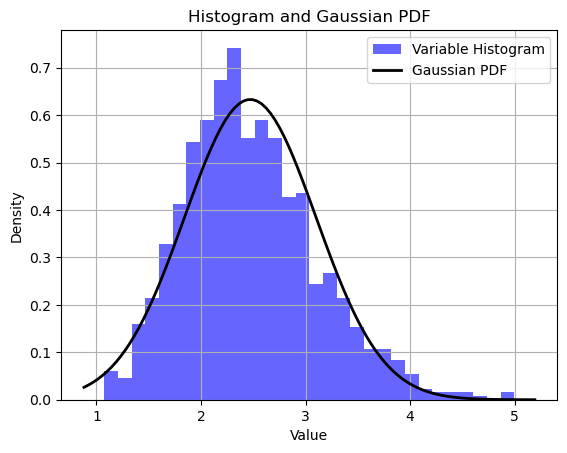

In [278]:
plt.hist(variable, bins=30, density=True, alpha=0.6, color='b', label='Variable Histogram')

# Plot the Gaussian PDF on top of the normalized histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean_variable, std_variable)
plt.plot(x, y, 'k', linewidth=2, label='Gaussian PDF')

plt.title('Histogram and Gaussian PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

#### 7. Sample Size of 100000

In [282]:
# Sample size
sample_size = 100000

In [284]:
lambda_exp = 1  # Exponential distribution rate (parameter lambda)
exp_samples = np.random.exponential(1 / lambda_exp, sample_size)
exp_samples

array([2.06226304, 3.11980858, 2.2702715 , ..., 1.07358944, 0.97946   ,
       0.32475896])

In [286]:
low_uniform = 3  # Lower bound for uniform distribution
high_uniform = 6  # Upper bound for uniform distribution
uniform_samples = np.random.uniform(low_uniform, high_uniform, sample_size)
uniform_samples

array([5.66878825, 3.30056839, 3.49129399, ..., 4.54170236, 3.75277662,
       3.35841604])

In [288]:
lambda_poisson = 2  # Poisson distribution rate (parameter lambda)
poisson_samples = np.random.poisson(lambda_poisson, sample_size)
poisson_samples

array([1, 1, 2, ..., 3, 1, 4])

In [290]:
variable = (exp_samples + uniform_samples + poisson_samples) / 3
variable

array([2.91035043, 2.47345899, 2.5871885 , ..., 2.87176393, 1.91074554,
       2.56105833])

In [292]:
mean_variable = np.mean(variable)
std_variable = np.std(variable)
std_error_variable = std_variable / np.sqrt(sample_size)

print(f"Mean': {mean_variable}")
print(f"Standard Deviation': {std_variable}")
print(f"Standard Error': {std_error_variable}")

Mean': 2.496187292096399
Standard Deviation': 0.6448098178762688
Standard Error': 0.0020390676821273658


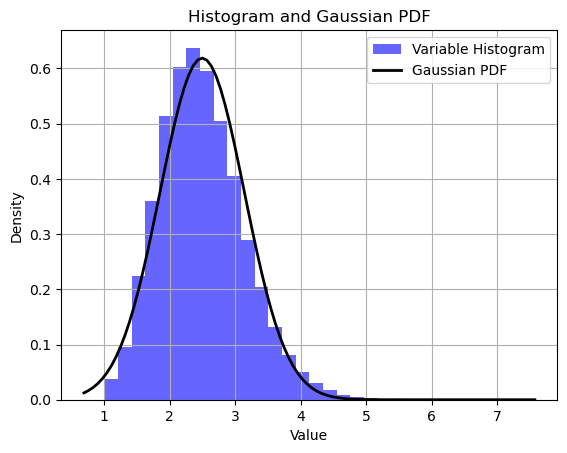

In [294]:
plt.hist(variable, bins=30, density=True, alpha=0.6, color='b', label='Variable Histogram')

# Plot the Gaussian PDF on top of the normalized histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean_variable, std_variable)
plt.plot(x, y, 'k', linewidth=2, label='Gaussian PDF')

plt.title('Histogram and Gaussian PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()